<h1>Topic Modelling (sklearn LDA)</h1>
<p>Topic Modeling is an unsupervised learning approach to clustering documents, to discover topics based on their contents.</p>

In [1]:
import pandas as pd
import numpy as np
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

C:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
C:\Users\ronal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\backports.py:7: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import LooseVersion


In [2]:
df = pd.read_csv('../result_sentiment.csv')
df[['platform','clean_body','label']]

,platform,clean_body,label
0,Twitter,yeezy boost dazzling blue coming yankeekicks ig,adidas
1,Twitter,worst omicron alhumdullilah cupcake breakfast ...,adidas
2,Twitter,blessing follower life changing nfts hour orig...,adidas
3,Twitter,south park professor chaos nmd releasing,adidas
4,Twitter,patronise sell shoe fake walk fast notice,adidas
...,...,...,...
18130,HardwareZone,jus hk factory outlet location block hong kon...,adidas
18131,HardwareZone,hubby citygate leh polo ralph polo tee pretty ...,adidas and nike
18132,HardwareZone,helpp toronto hong kong december long wanna sh...,nike
18133,HardwareZone,hihi wanna post guide monkey post addidas shi...,nike


In [3]:
no_of_words = df['clean_body'].apply(lambda x: len(str(x).split(' ')))
avg = round(no_of_words.sum()/len(no_of_words), 2)
print("Average no of words for each row: ", avg)

Average no of words for each row:  16.31


<h2>CountVectorizer</h2>
<p>To turn the text into a matrix, where each row in the matrix encodes which words appeared in each individual text. We will also filter the words max_df=0.9 means we discard any words that appear in >90% of the data. We will also filter words using min_df = 25, so words that appear in less than 25 rows will be discarded. We discard high appearing words since they are too common to be meaningful in topics. We discard low appearing words because we won’t have a strong enough signal and they will just introduce noise to our model.</p>

<p>Using this matrix the topic modelling algorithms will form topics from the words. Each of the algorithms does this in a different way, but the basics are that the algorithms look at the co-occurrence of words in the text and if words often appearing in the same text together, then these words are likely to form a topic together. The algorithm will form topics which group commonly co-occurring words. A topic in this sense, is just list of words that often appear together and also scores associated with each of these words in the topic. The higher the score of a word in a topic, the higher that word’s importance in the topic. Each topic will have a score for every word found in the text, in order to make sense of the topics we usually only look at the top words - the words with low scores are irrelevant.</p>

In [4]:
# vectorizer object used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, analyzer='word')

# apply transformation
tf = vectorizer.fit_transform(df['clean_body'].astype('U')).toarray()

# tf_feature_names tells us what word each column in the matrix represents
tf_feature_names = vectorizer.get_feature_names_out()
tf_feature_names

array(['absolute', 'absolutely', 'accept', ..., 'zoom', 'zoomx', 'zx'],
      dtype=object)

In [5]:
len(tf_feature_names)

1697

<h2>LDA</h2>

In [6]:
lda_model = LDA(n_components=10, random_state=0)
lda_model.fit(tf)
topic_results = lda_model.transform(tf)

In [7]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    cols = 0 
    for topic_idx, topic in enumerate(model.components_):
        if cols < 5:
            topic_dict["Topic words %d" % (topic_idx + 1)] = ['{}'.format(feature_names[i])
                            for i in topic.argsort()[:-no_top_words - 1:-1]]
            topic_dict["Topic weights %d" % (topic_idx + 1)] = ['{:.1f}'.format(topic[i])
                            for i in topic.argsort()[:-no_top_words - 1:-1]]
            cols += 1
    return pd.DataFrame(topic_dict)


no_top_words = 10
display_topics(lda_model, tf_feature_names, no_top_words)

,Topic words 1,Topic weights 1,Topic words 2,Topic weights 2,Topic words 3,Topic weights 3,Topic words 4,Topic weights 4,Topic words 5,Topic weights 5
0,people,923.7,la,552.2,air,1287.0,time,489.4,dunk,933.1
1,company,554.8,le,219.1,size,860.8,brand,461.1,official,450.0
2,stock,541.2,el,203.1,jordan,645.2,order,322.6,kit,415.1
3,product,448.3,se,174.5,max,522.4,game,313.5,image,367.8
4,dec,420.5,si,137.1,black,521.8,company,312.3,deal,351.3
5,subreddit,411.1,day,129.8,white,398.7,china,241.9,sb,308.1
6,buy,386.7,una,120.1,price,280.2,player,205.8,kobe,255.1
7,money,307.7,pa,106.1,force,249.6,store,198.5,amp,248.9
8,year,300.4,los,99.1,pair,241.9,people,191.1,high,224.9
9,lot,262.8,para,88.5,retro,219.8,day,187.7,season,220.9


In [8]:
pyLDAvis.enable_notebook()
tf = np.matrix(tf)
vis = pyLDAvis.sklearn.prepare(lda_model, tf, vectorizer)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.120153 -0.094802       1        1  19.052663
0     -0.200156 -0.022265       2        1  18.159655
3     -0.171281  0.013105       3        1  14.268215
2      0.123236 -0.185943       4        1  10.400259
4      0.142961 -0.101625       5        1   7.894756
9      0.110753 -0.222538       6        1   7.092814
5     -0.104869  0.023411       7        1   6.793943
6     -0.172463  0.150600       8        1   6.308327
8      0.273215  0.159629       9        1   5.665562
1      0.118756  0.280427      10        1   4.363806, topic_info=        Term         Freq        Total Category  logprob  loglift
747   jersey  1251.000000  1251.000000  Default  30.0000  30.0000
26       air  1249.000000  1249.000000  Default  29.0000  29.0000
1327    shoe  2889.000000  2889.000000  Default  28.0000  28.0000
429     dunk  1296.000000  1296.000000  Default  27.0000  27.0000
786       la   634.000000   634.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
1062    para    95.803547   209.897828  Topic10  -4.3310   2.3475
1131     por    76.075530   143.134608  Topic10  -4.5616   2.4998
355      day   140.399964   897.603017  Topic10  -3.9488   1.2766
343       da    68.013227   386.053449  Topic10  -4.6736   1.3956
730     item    64.687032   284.117170  Topic10  -4.7237   1.6520

[583 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         2  0.053414  absolute
0         3  0.934745  absolute
3         5  0.082532    access
3         7  0.907856    access
6         1  0.129411    action
...     ...       ...       ...
1690      2  0.132695     youth
1690      3  0.009478     youth
1690      9  0.853039     youth
1693      6  0.954191       yzy
1695      1  0.969554     zoomx

[1422 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 4, 3, 5, 10, 6, 7, 9, 2])

In [9]:
df['topic_no'] = topic_results.argmax(axis=1)
df[['platform','date','body','clean_body','label','topic_no']]

,platform,date,body,clean_body,label,topic_no
0,Twitter,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,yeezy boost dazzling blue coming yankeekicks ig,adidas,9
1,Twitter,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,worst omicron alhumdullilah cupcake breakfast ...,adidas,6
2,Twitter,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,blessing follower life changing nfts hour orig...,adidas,5
3,Twitter,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,south park professor chaos nmd releasing,adidas,4
4,Twitter,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...",patronise sell shoe fake walk fast notice,adidas,7
...,...,...,...,...,...,...
18130,HardwareZone,20-08-2008 01:52:51,jus came back from hk.\n\n\nAdidas Factory out...,jus hk factory outlet location block hong kon...,adidas,7
18131,HardwareZone,24-08-2008 15:03:34,Me and hubby like Citygate leh. Polo Ralph Pol...,hubby citygate leh polo ralph polo tee pretty ...,adidas and nike,2
18132,HardwareZone,11-10-2008 04:19:53,"helpp!\n\nOkay, I am from Toronto & I'm going ...",helpp toronto hong kong december long wanna sh...,nike,7
18133,HardwareZone,30-10-2008 17:28:01,hihi... sorry all just wanna ask.. so the post...,hihi wanna post guide monkey post addidas shi...,nike,0


In [10]:
def map_topics(model, feature_names):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict[topic_idx] = ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topic_dict

topics_map = map_topics(lda_model, tf_feature_names)
df['topic_words'] = df['topic_no'].map(topics_map)
df[['platform','date','body','clean_body','label','topic_no','topic_words']]

,platform,date,body,clean_body,label,topic_no,topic_words
0,Twitter,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,yeezy boost dazzling blue coming yankeekicks ig,adidas,9,"[yeezy, dunk, boost, drop, good, app, coming, ..."
1,Twitter,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,worst omicron alhumdullilah cupcake breakfast ...,adidas,6,"[park, ivy, em, love, um, support, da, para, l..."
2,Twitter,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,blessing follower life changing nfts hour orig...,adidas,5,"[blackpink, nft, nfts, card, fake, photo, meta..."
3,Twitter,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,south park professor chaos nmd releasing,adidas,4,"[dunk, official, kit, image, deal, sb, kobe, a..."
4,Twitter,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...",patronise sell shoe fake walk fast notice,adidas,7,"[shoe, wear, pair, good, running, foot, bought..."
...,...,...,...,...,...,...,...
18130,HardwareZone,20-08-2008 01:52:51,jus came back from hk.\n\n\nAdidas Factory out...,jus hk factory outlet location block hong kon...,adidas,7,"[shoe, wear, pair, good, running, foot, bought..."
18131,HardwareZone,24-08-2008 15:03:34,Me and hubby like Citygate leh. Polo Ralph Pol...,hubby citygate leh polo ralph polo tee pretty ...,adidas and nike,2,"[air, size, jordan, max, black, white, price, ..."
18132,HardwareZone,11-10-2008 04:19:53,"helpp!\n\nOkay, I am from Toronto & I'm going ...",helpp toronto hong kong december long wanna sh...,nike,7,"[shoe, wear, pair, good, running, foot, bought..."
18133,HardwareZone,30-10-2008 17:28:01,hihi... sorry all just wanna ask.. so the post...,hihi wanna post guide monkey post addidas shi...,nike,0,"[people, company, stock, product, dec, subredd..."


<AxesSubplot:title={'center':'Topics distribution'}, xlabel='topic_no'>

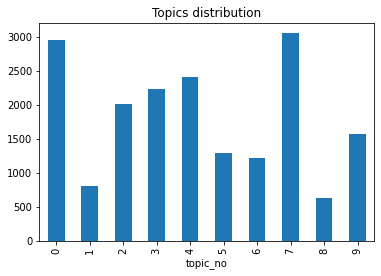

In [11]:
df.groupby('topic_no').size().plot(kind='bar', title='Topics distribution')

In [12]:
df.to_excel('../result_topics.xlsx', index=False)